In [3]:
import torch

/Users/maxperozek/opt/anaconda3/envs/comp_gr_thy/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import networkx as nx

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import torch_geometric as tgn

In [8]:
from torch.nn import Sequential as Seq, Linear, ReLU

In [9]:
from torch_geometric.nn import MessagePassing

In [10]:
class EdgeConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='min') #  "Max" aggregation.
        self.mlp = Seq(Linear(2 * in_channels, out_channels),
                       ReLU(),
                       Linear(out_channels, out_channels))

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        return self.propagate(edge_index, x=x)

    def message(self, x_i, x_j):
        # x_i has shape [E, in_channels]
        # x_j has shape [E, in_channels]

        tmp = torch.cat([x_i, x_j - x_i], dim=1)  # tmp has shape [E, 2 * in_channels]
        return self.mlp(tmp)

In [11]:
layer = EdgeConv(3,3)

In [13]:
from skimage.io import imread

In [14]:
im = np.random.random((8,8,3))

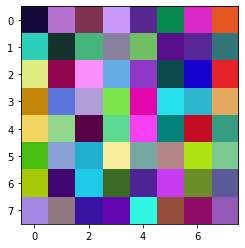

In [15]:
plt.imshow(im)

In [16]:
edges = list(nx.erdos_renyi_graph(64, .1).edges())

In [17]:
edges_tensor = torch.tensor(edges).T

In [18]:
edges_tensor

tensor([[ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
          5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,
          8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11,
         11, 11, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16,
         16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19,
         19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 22, 22,
         22, 22, 22, 22, 23, 23, 23, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27,
         27, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32,
         33, 33, 33, 33, 33, 33, 34, 35, 35, 35, 35, 36, 37, 38, 38, 39, 40, 40,
         42, 43, 44, 44, 46, 46, 47, 47, 49, 49, 50, 50, 51, 51, 51, 51, 52, 53,
         53, 54, 56, 58, 59],
        [15, 22, 30, 31, 58, 10, 31, 37, 39, 49, 62, 10, 18, 21, 25, 27, 38, 57

In [20]:
x = layer(torch.tensor(im.reshape(-1,3)).float(), edges_tensor)

In [22]:
x.shape

torch.Size([64, 3])

In [23]:
x

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [-0.1461, -0.5071,  0.4012],
        [-0.1374, -0.6720,  0.5873],
        [-0.1526, -0.6369,  0.4578],
        [-0.1092, -0.5025,  0.3776],
        [ 0.0000,  0.0000,  0.0000],
        [-0.2034, -0.5341,  0.3937],
        [-0.2264, -0.5555,  0.4069],
        [-0.1843, -0.5909,  0.4362],
        [-0.0914, -0.5803,  0.3589],
        [-0.0844, -0.5256,  0.3939],
        [-0.2200, -0.4730,  0.3928],
        [-0.2065, -0.5095,  0.4348],
        [-0.2676, -0.5883,  0.4434],
        [-0.1811, -0.6665,  0.4233],
        [-0.3329, -0.5610,  0.4302],
        [ 0.0000,  0.0000,  0.0000],
        [-0.0493, -0.6122,  0.4096],
        [-0.2897, -0.5892,  0.3819],
        [-0.2373, -0.5772,  0.3598],
 